<a href="https://colab.research.google.com/github/petmorr/Machine-Learning-Data-Analytics/blob/main/ML%26DA_CW_2024_25A_P_Morris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Description

In [ ]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset
file_path = "heart_statlog_cleveland_hungary_final.csv"
df = pd.read_csv(file_path)

# Rename columns for clarity based on the documentation
columns = [
    "age", "sex", "chest_pain_type", "resting_bp", "cholesterol",
    "fasting_blood_sugar", "resting_ecg", "max_heart_rate",
    "exercise_angina", "oldpeak", "st_slope", "target"
]
df.columns = columns

In [ ]:
# Summary statistics for numeric columns
numeric_columns = ["age", "resting_bp", "cholesterol", "max_heart_rate", "oldpeak"]
summary_stats = df[numeric_columns].describe().T
print("Summary Statistics for Numeric Features")
print(summary_stats)

Summary Statistics for Numeric Features
                 count        mean         std   min    25%    50%     75%  \
age             1190.0   53.720168    9.358203  28.0   47.0   54.0   60.00   
resting_bp      1190.0  132.153782   18.368823   0.0  120.0  130.0  140.00   
cholesterol     1190.0  210.363866  101.420489   0.0  188.0  229.0  269.75   
max_heart_rate  1190.0  139.732773   25.517636  60.0  121.0  140.5  160.00   
oldpeak         1190.0    0.922773    1.086337  -2.6    0.0    0.6    1.60   

                  max  
age              77.0  
resting_bp      200.0  
cholesterol     603.0  
max_heart_rate  202.0  
oldpeak           6.2  


In [ ]:
# Categorical feature distributions
categorical_columns = ["sex", "chest_pain_type", "fasting_blood_sugar", "resting_ecg", "exercise_angina", "st_slope", "target"]
categorical_distributions = df[categorical_columns].apply(pd.Series.value_counts)
print("\nCategorical Feature Distributions")
print(categorical_distributions)


Categorical Feature Distributions
     sex  chest_pain_type  fasting_blood_sugar  resting_ecg  exercise_angina  \
0  281.0              NaN                936.0        684.0            729.0   
1  909.0             66.0                254.0        181.0            461.0   
2    NaN            216.0                  NaN        325.0              NaN   
3    NaN            283.0                  NaN          NaN              NaN   
4    NaN            625.0                  NaN          NaN              NaN   

   st_slope  target  
0       1.0   561.0  
1     526.0   629.0  
2     582.0     NaN  
3      81.0     NaN  
4       NaN     NaN  


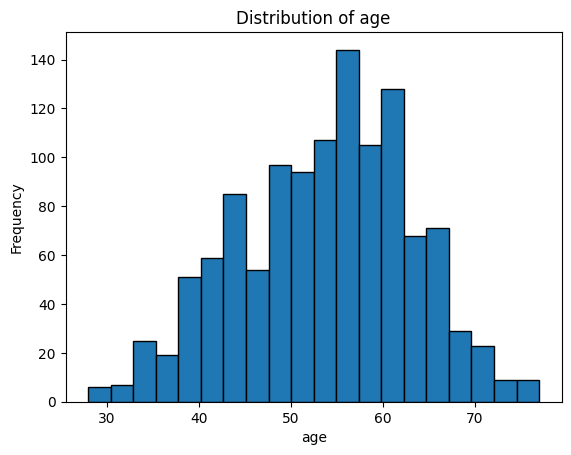

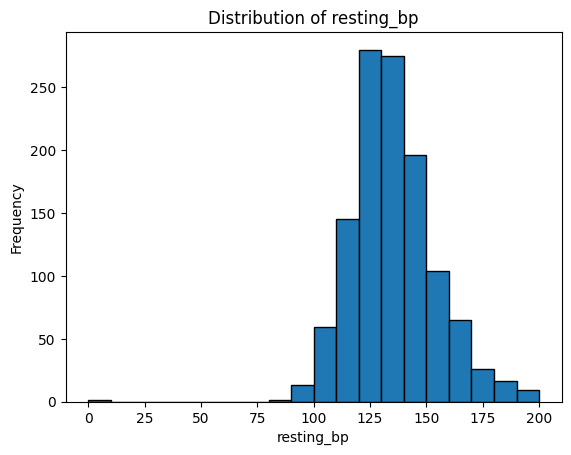

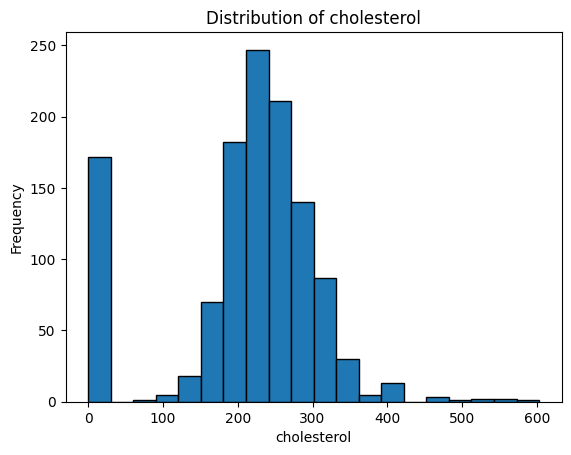

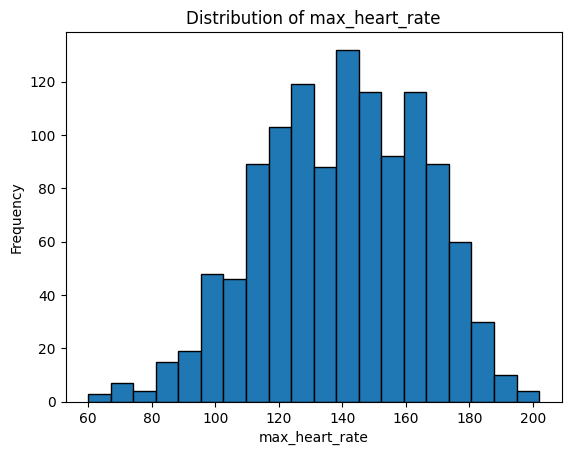

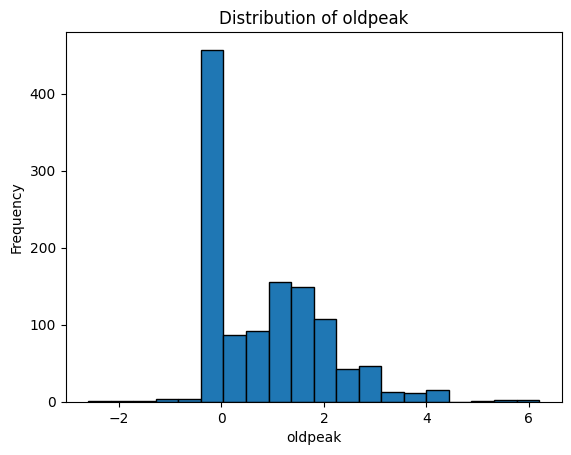

In [ ]:
# Histogram for numeric features
for col in numeric_columns:
    plt.figure()
    df[col].hist(bins=20, edgecolor="black")
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.grid(False)
    plt.show()

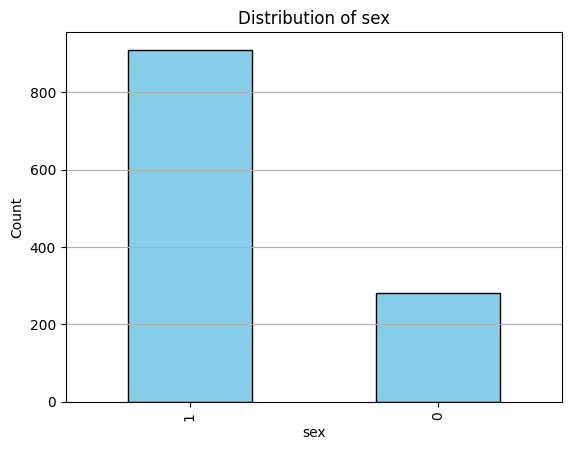

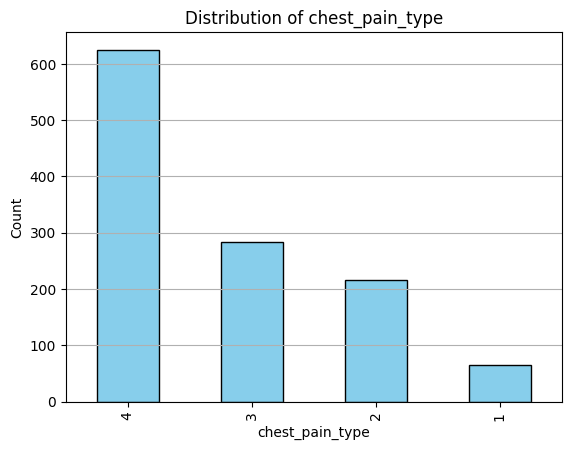

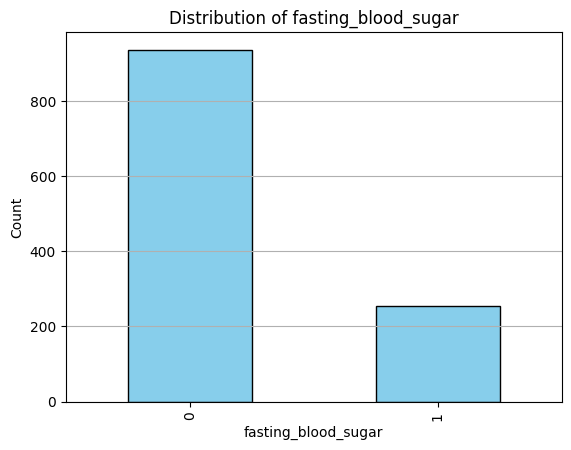

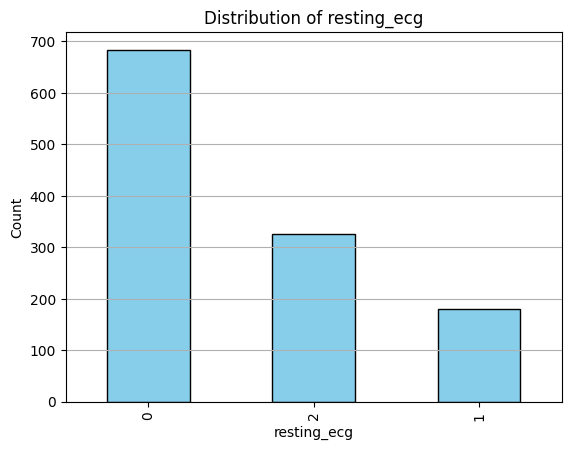

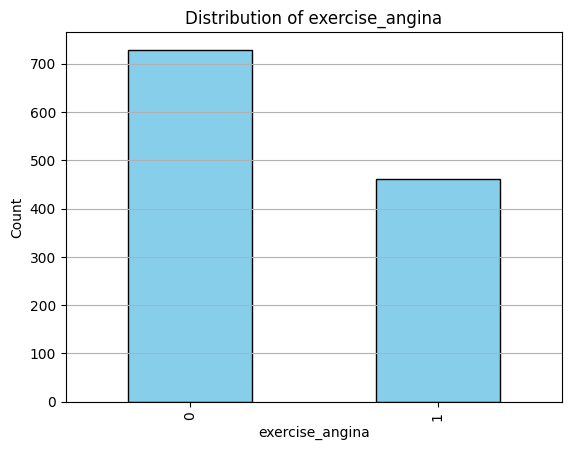

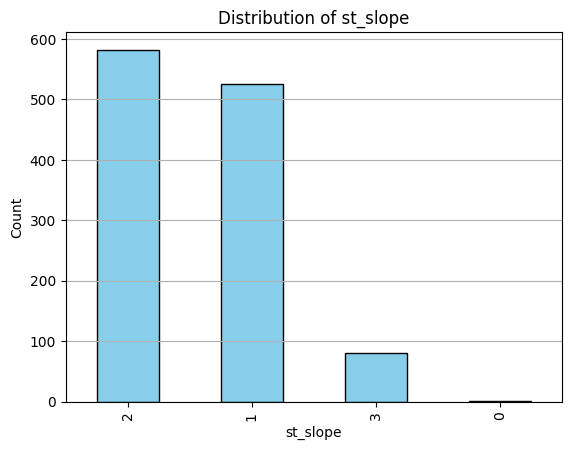

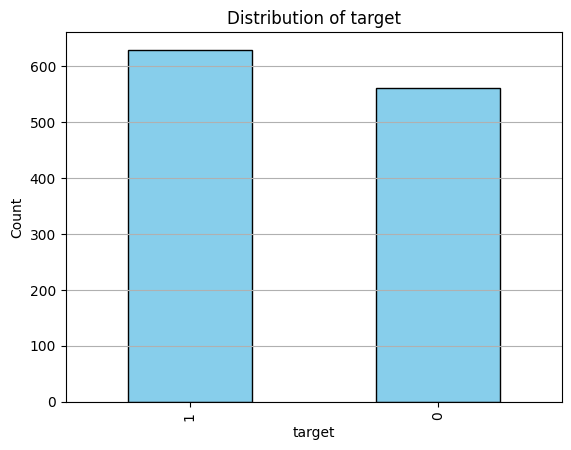

In [ ]:
# Bar plots for categorical features
for col in categorical_columns:
    plt.figure()
    df[col].value_counts().plot(kind="bar", color="skyblue", edgecolor="black")
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.grid(axis="y")
    plt.show()

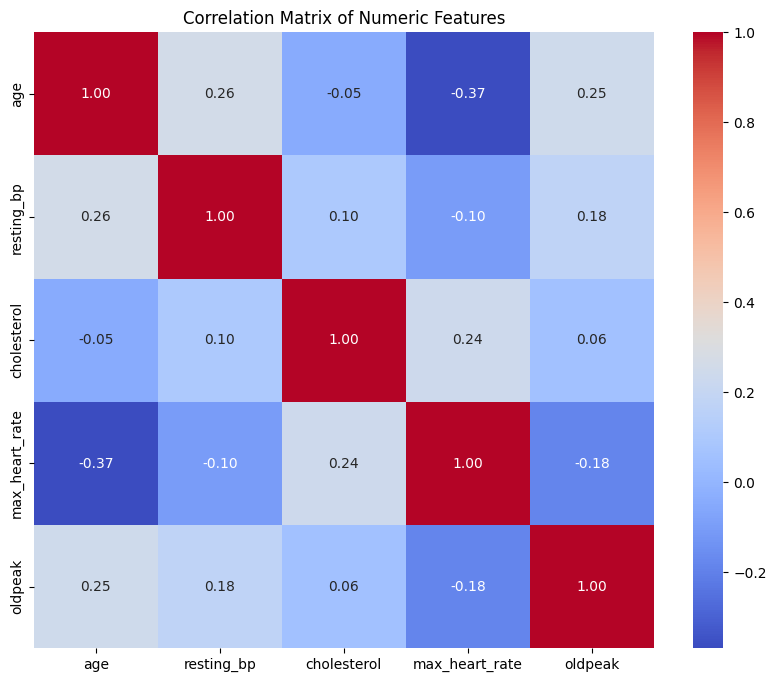

In [ ]:
# Correlation heatmap for numeric features
plt.figure(figsize=(10, 8))
corr_matrix = df[numeric_columns].corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix of Numeric Features")
plt.show()

# Data Preprocessing

<ipython-input-7-fbeda721c1ea>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col] = df_cleaned[col].replace(0, mean_value)
<ipython-input-7-fbeda721c1ea>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['oldpeak'] = df_cleaned['oldpeak'].apply(lambda x: max(x, 0))  # Replace negative values with 0
<ipython-input-7-fbeda721c1ea>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

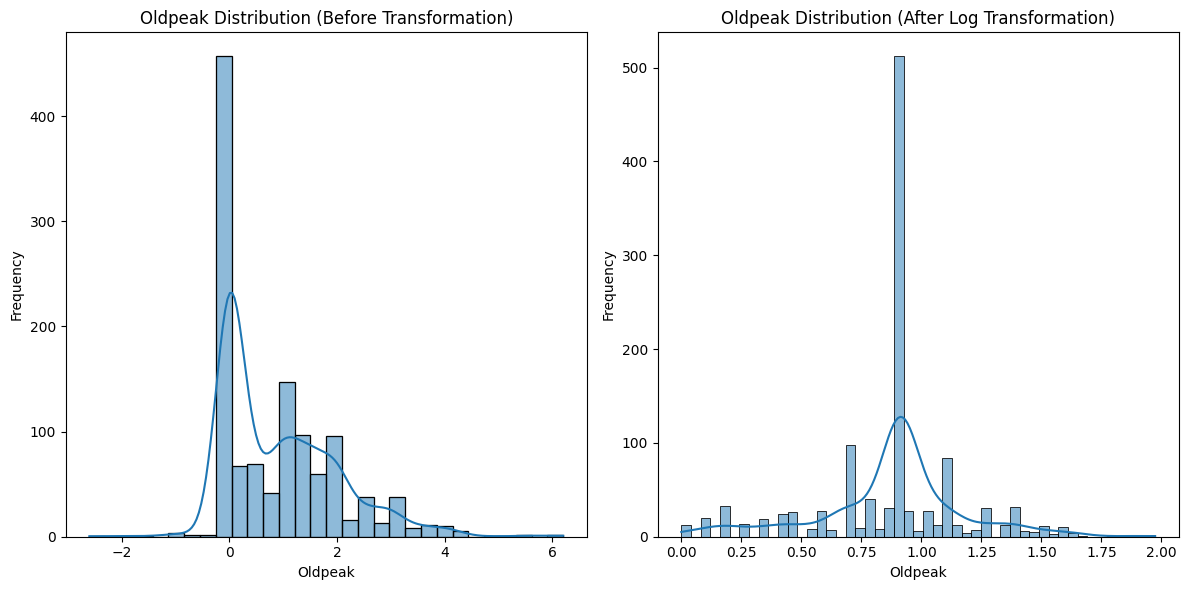

<ipython-input-7-fbeda721c1ea>:48: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X.replace([np.inf, -np.inf], np.nan, inplace=True)  # Replace Inf with NaN


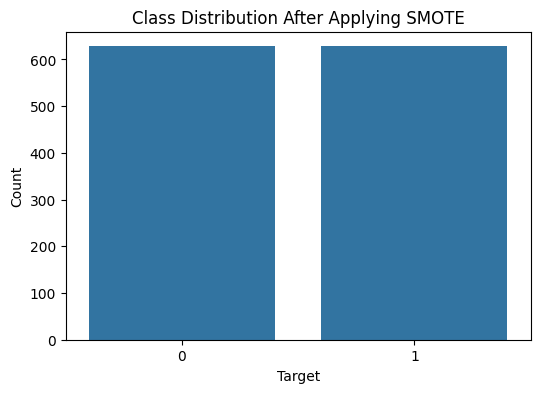

In [ ]:
# Import required libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Replace zero values in 'resting_bp' with NaN
df['resting_bp'] = df['resting_bp'].replace(0, pd.NA)

# Dropping rows with missing values (if any)
df_cleaned = df.dropna()

# Impute zero values in numeric columns with the mean of their respective columns
numeric_columns_with_zeros = ["cholesterol", "resting_bp", "max_heart_rate", "oldpeak"]

for col in numeric_columns_with_zeros:
    mean_value = df_cleaned[col].replace(0, None).mean()
    df_cleaned[col] = df_cleaned[col].replace(0, mean_value)

# Log Transformation: Ensure all values in 'oldpeak' are non-negative before log transformation
df_cleaned['oldpeak'] = df_cleaned['oldpeak'].apply(lambda x: max(x, 0))  # Replace negative values with 0
df_cleaned['oldpeak'] = np.log1p(df_cleaned['oldpeak'])  # Apply log transformation

# Visualizing 'oldpeak' distribution before and after transformation
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['oldpeak'], kde=True)
plt.title('Oldpeak Distribution (Before Transformation)')
plt.xlabel('Oldpeak')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(df_cleaned['oldpeak'], kde=True)
plt.title('Oldpeak Distribution (After Log Transformation)')
plt.xlabel('Oldpeak')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Encoding categorical variables for features like chest_pain_type, st_slope, etc.
X = pd.get_dummies(df_cleaned, columns=["chest_pain_type", "resting_ecg", "st_slope"], drop_first=True)

# Separating features (X) and target (y)
X = X.drop(columns=["target"])
y = df_cleaned["target"]

# Replace Inf and NaN values in the dataset
X.replace([np.inf, -np.inf], np.nan, inplace=True)  # Replace Inf with NaN
X.fillna(0, inplace=True)  # Replace remaining NaN values with 0 (or another appropriate value)

# Standardizing numeric features
numeric_columns = ["age", "resting_bp", "cholesterol", "max_heart_rate", "oldpeak"]
scaler = StandardScaler()
X[numeric_columns] = scaler.fit_transform(X[numeric_columns])

# Handling class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Splitting the dataset into training, validation, and testing sets (70% train, 15% validation, 15% test)
from sklearn.model_selection import train_test_split
X_train, X_temp, y_train, y_temp = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42, stratify=y_resampled)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Visualizing the class distribution after applying SMOTE
plt.figure(figsize=(6, 4))
sns.countplot(x=y_resampled)
plt.title("Class Distribution After Applying SMOTE")
plt.xlabel("Target")
plt.ylabel("Count")
plt.show()

# Model Construction

In [ ]:
# Import required libraries
from sklearn.ensemble import RandomForestClassifier

# Random Forest Model Construction
rf = RandomForestClassifier(random_state=42)

# Training the model
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

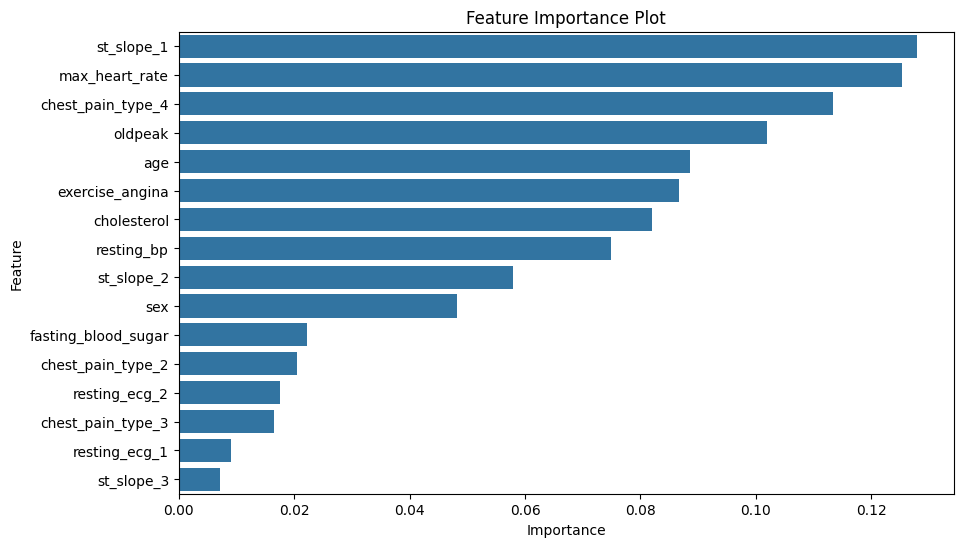

In [ ]:
# Import required libraries
from sklearn.model_selection import GridSearchCV

# Get feature importances
feature_importances = rf.feature_importances_

# Create a DataFrame for easy plotting
feature_importance_df = pd.DataFrame({"Feature": X.columns, "Importance": feature_importances})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feature_importance_df)
plt.title("Feature Importance Plot")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

# Model Tuning

In [ ]:
# Hyperparameter Tuning using GridSearchCV
param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring="accuracy", n_jobs=-1)
grid_search.fit(X_val, y_val)

# Best Model
best_rf = grid_search.best_estimator_

# Display Best Parameters
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}


# Model Testing

Test Accuracy: 0.9312169312169312

Classification Report:
                   precision    recall  f1-score   support

No Heart Disease       0.96      0.91      0.93        95
   Heart Disease       0.91      0.96      0.93        94

        accuracy                           0.93       189
       macro avg       0.93      0.93      0.93       189
    weighted avg       0.93      0.93      0.93       189


Confusion Matrix:
 [[86  9]
 [ 4 90]]

ROC-AUC Score: 0.9675811870100783


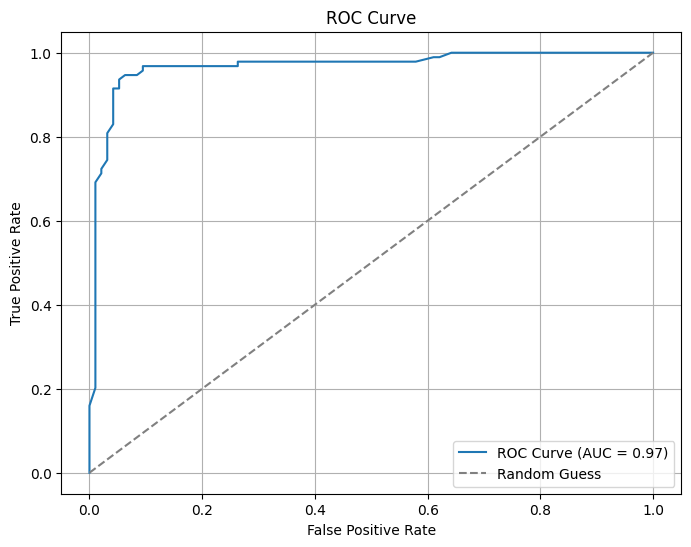

In [ ]:
# Using the best parameters identified to construct the Random Forest model
best_rf = RandomForestClassifier(
    max_depth=None,
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=200,
    random_state=42
)

# Train the model on the training data
best_rf.fit(X_train, y_train)

# Predict on the test dataset
y_test_pred = best_rf.predict(X_test)

# Metrics calculation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

test_accuracy = accuracy_score(y_test, y_test_pred)
test_report = classification_report(y_test, y_test_pred, target_names=["No Heart Disease", "Heart Disease"])
test_conf_matrix = confusion_matrix(y_test, y_test_pred)

# ROC-AUC and curve
y_test_prob = best_rf.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_test_prob)
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)

# Displaying the results
print("Test Accuracy:", test_accuracy)
print("\nClassification Report:\n", test_report)
print("\nConfusion Matrix:\n", test_conf_matrix)
print("\nROC-AUC Score:", roc_auc)

# Plotting the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()